#  STOCK PRICE ESTIMATOR TESTING MODEL


1) The aim of the algorithm is to test the accuracy of our estimator on past data 

2) We are going to run this algoritm pick provide stocks for each week 

3) The dataframe will have : 
Date/week, Stock name,previous price(date), predicted price, actual price, predicted gain , actual gain , selection

In [168]:
import numpy as np    #necessary for using arrays in the algorithm
import pandas as pd  #necessary for dealing with datasets
import matplotlib.pyplot as plt  #necessary to plot graphs 
from collections import Counter #counter 
from collections import OrderedDict

from sklearn.preprocessing import MinMaxScaler #importing the MinMaxScaler to normalize the data and fit it in the range of 0 to 1

from keras.models import Sequential #necessary for building the model that predicts the price 
from keras.layers import LSTM    # Using the LSTM recurrent neural network to predict the value using adam optimizer and mean loss squared error approx
from keras.layers import Dropout  #dropout is used to ignore a certain percentage of values to avoid overfitting of data
from keras.layers import Dense 
from datetime import date 
from datetime import datetime



In [169]:
df = pd.read_csv("C:\\Users\\Siddhant\\OneDrive\\Desktop\\Data\\All_Yahoo_Prices.csv")
df = df[['Date','Symbol','Close']].copy() #imported the dataset and modified it into the date, symbol and close columns only
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True) 

df = df.set_index(['Date']) #Setting the date column as the index

df = df.sort_index(ascending=True) #sorting by date , in ascending order
print (df.index[0])
print (df.head())


2001-01-06 00:00:00
                Symbol      Close
Date                             
2001-01-06  CENTURYTEX  30.630959
2001-01-06   BLUECOAST  93.969635
2001-01-06    AXISBANK   5.336815
2001-01-06   BRITANNIA  47.938374
2001-01-06       CIPLA  77.630035


Initialising the lists

In [170]:
Stocklist = list(set(df['Symbol']))  #list of all the stocks in the dataset
stockname = [] #list to store the stock names 
prev_week_price = [] #list to store the previous week price
predicted_price = [] #list to store the predicted price 
actual_price = [] #list to store the actual price 
predicted_growth= [] #list to store the predicted growth
actual_growth=[]  #list to store the actual growth
pick = [] #list that stores the recommendation , ie, Yes or No
week_date = [] #stores the date for prediction 
final=[] #stores the combined list 


Building The Model

            Symbol      Close
Date                         
2014-12-11  AVTNPL  38.150494
2014-12-12  AVTNPL  34.205441
2014-12-15  AVTNPL  33.757145
2014-12-16  AVTNPL  32.726044
2014-12-17  AVTNPL  32.143253
2014-12-18  AVTNPL  33.622646
2014-12-19  AVTNPL  33.801968
2014-12-22  AVTNPL  33.398495
2014-12-23  AVTNPL  33.712315
2014-12-24  AVTNPL  34.160614
2014-12-26  AVTNPL  34.339924
2014-12-29  AVTNPL  33.891624
2014-12-30  AVTNPL  34.115780
2014-12-31  AVTNPL  34.115780
2015-01-01  AVTNPL  35.326195
2014-12-26 00:00:00
Epoch 1/25
37/37 [==============================] - 8s 100ms/step - loss: 0.0245
Epoch 2/25
37/37 [==============================] - 4s 108ms/step - loss: 0.0120
Epoch 3/25
37/37 [==============================] - 4s 111ms/step - loss: 0.0104
Epoch 4/25
37/37 [==============================] - 4s 108ms/step - loss: 0.0118
Epoch 5/25
37/37 [==============================] - 4s 121ms/step - loss: 0.0123
Epoch 6/25
37/37 [==============================] - 4s 107ms/step

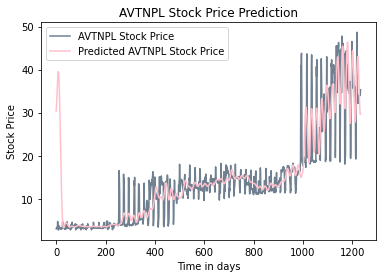

1/1 [==============================] - 0s 40ms/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No')]
            Symbol      Close
Date                         
2014-12-11  BIOCON  72.200783
2014-12-12  BIOCON  73.604073
2014-12-15  BIOCON  73.782532
2014-12-16  BIOCON  69.605095
2014-12-17  BIOCON  68.866943
2014-12-18  BIOCON  70.578461
2014-12-19  BIOCON  70.570358
2014-12-22  BIOCON  70.805595
2014-12-23  BIOCON  68.745270
2014-12-24  BIOCON  66.944504
2014-12-26  BIOCON  67.682663
2014-12-29  BIOCON  67.487976
2014-12-30  BIOCON  68.858826
2014-12-31  BIOCON  69.037285
2015-01-01  BIOCON  68.956169
2014-12-26 00:00:00
Epoch 1/25
37/37 [==============================] - 10s 128ms/step - loss: 0.0348
Epoch 2/25
37/37 [==============================] - 5s 123ms/step - loss: 0.0136
Epoch 3/25
37/37 [==============================] - 5s 123ms/step - loss: 0.0134
Epoch 4/25
37/37 [============

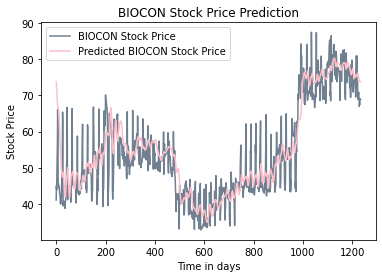

1/1 [==============================] - 0s 30ms/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes')]
                Symbol      Close
Date                             
2014-12-11  CHAMBLFERT  57.102737
2014-12-12  CHAMBLFERT  54.586632
2014-12-15  CHAMBLFERT  53.904305
2014-12-16  CHAMBLFERT  51.857307
2014-12-17  CHAMBLFERT  50.961739
2014-12-18  CHAMBLFERT  51.899948
2014-12-19  CHAMBLFERT  51.644077
2014-12-22  CHAMBLFERT  51.942593
2014-12-23  CHAMBLFERT  51.174969
2014-12-24  CHAMBLFERT  51.302906
2014-12-26  CHAMBLFERT  51.132332
2014-12-29  CHAMBLFERT  51.089680
2014-12-30  CHAMBLFERT  51.601433
2014-12-31  CHAMBLFERT  51.814659
2015-01-01  CHAMBLFERT  52.198467
2014-12-26 00:00:00
Epoch 1/25
37/37 [==============================] - 9s 122ms/s

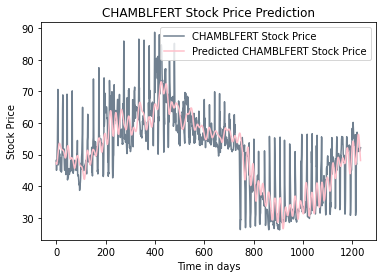

1/1 [==============================] - 0s 33ms/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No')]
             Symbol  Close
Date                      
2014-12-11  BURNPUR  12.55
2014-12-12  BURNPUR   8.95
2014-12-15  BURNPUR   9.10
2014-12-16  BURNPUR   8.65
2014-12-17  BURNPUR   8.20
2014-12-18  BURNPUR   8.30
2014-12-19  BURNPUR   8.45
2014-12-22  BURNPUR   8.30
2014-12-23  BURNPUR   8.35
2014-12-24  BURNPUR   8.50
2014-12-26  BURNPUR   8.60
2014-12-29  BURNPUR   8.35
2014-12-30  BURNPUR   7.60
2014-12-31  BURNPUR   9.10
2015-01-01  BURNPUR   9.65
2014-12-26 00:00:00
Epoch 1/25
37/37 [================

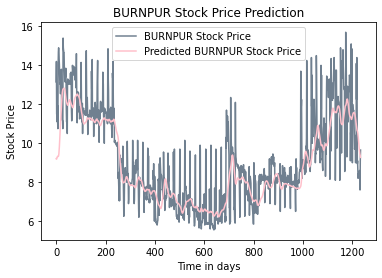

1/1 [==============================] - 0s 24ms/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes')]
               Symbol  Close
Date                        
2014-12-11  CINEVISTA   3.95
2014-12-12  CINEVISTA   3.95
2014-12-15  CINEVISTA   4.45
2014-12-16  CINEVISTA   4.30
2014-12-17  CINEVISTA   3.80
2014-12-18  CINEVISTA   3.80
2014-12-19  CINEVISTA   3.70
2014-12-22  CINEVISTA   3.65
2014-12-23  CINEVISTA   3.65
2014-12-24  CINEVISTA   3.75
2014-12-26  CINEVIST

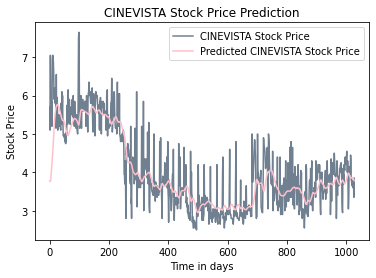

1/1 [==============================] - 0s 16ms/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes'), ('2015-01-01 00:00:00', 'CINEVISTA', 3.599999905, array([[3.7642553]], dtype=float32), 3.849999905, 1.0456265211105347, 1.0694444462770063, 'Yes')]
              Symbol      Close
Date                           
2014-12-11  BSLNIFTY  81.019997
2014-12-12  BSLNIFTY  86.989998
2014-12-15  BSLNIFTY  88.400002
2014-12-16  BSLNIFTY  89.000000
2014-12-17  BSLNIFTY  89.000

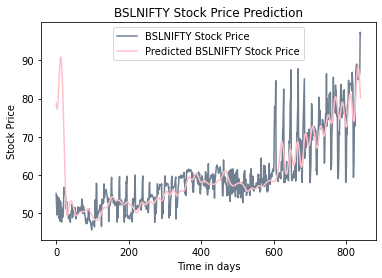

1/1 [==============================] - 0s 31ms/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes'), ('2015-01-01 00:00:00', 'CINEVISTA', 3.599999905, array([[3.7642553]], dtype=float32), 3.849999905, 1.0456265211105347, 1.0694444462770063, 'Yes'), ('2015-01-01 00:00:00', 'BSLNIFTY', 85.94999695, array([[78.73029]], dtype=float32), 97.0, 0.9160011410713196, 1.1285631581398212, 'No')]
              Symbol      Close
Date                           
2014-12-11  BEDMUT

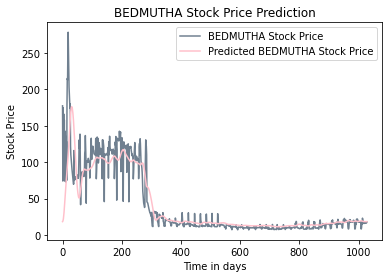

1/1 [==============================] - 0s 57ms/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes'), ('2015-01-01 00:00:00', 'CINEVISTA', 3.599999905, array([[3.7642553]], dtype=float32), 3.849999905, 1.0456265211105347, 1.0694444462770063, 'Yes'), ('2015-01-01 00:00:00', 'BSLNIFTY', 85.94999695, array([[78.73029]], dtype=float32), 97.0, 0.9160011410713196, 1.1285631581398212, 'No'), ('2015-01-01 00:00:00', 'BEDMUTHA', 16.20000076, array([[18.430365]], dtype=float3

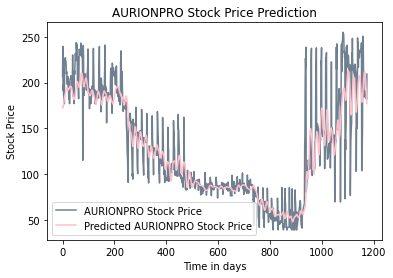

1/1 [==============================] - 0s 49ms/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes'), ('2015-01-01 00:00:00', 'CINEVISTA', 3.599999905, array([[3.7642553]], dtype=float32), 3.849999905, 1.0456265211105347, 1.0694444462770063, 'Yes'), ('2015-01-01 00:00:00', 'BSLNIFTY', 85.94999695, array([[78.73029]], dtype=float32), 97.0, 0.9160011410713196, 1.1285631581398212, 'No'), ('2015-01-01 00:00:00', 'BEDMUTHA', 16.20000076, array([[18.430365]], dtype=float3

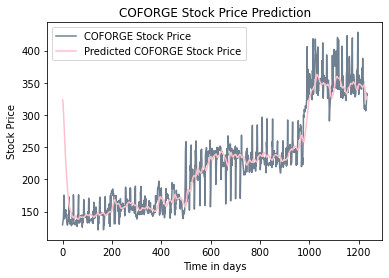

1/1 [==============================] - 0s 31ms/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes'), ('2015-01-01 00:00:00', 'CINEVISTA', 3.599999905, array([[3.7642553]], dtype=float32), 3.849999905, 1.0456265211105347, 1.0694444462770063, 'Yes'), ('2015-01-01 00:00:00', 'BSLNIFTY', 85.94999695, array([[78.73029]], dtype=float32), 97.0, 0.9160011410713196, 1.1285631581398212, 'No'), ('2015-01-01 00:00:00', 'BEDMUTHA', 16.20000076, array([[18.430365]], dtype=float3

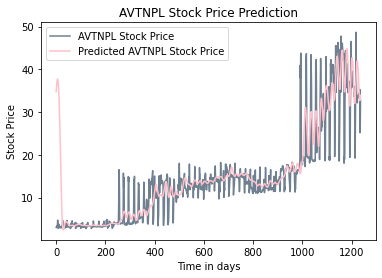

1/1 [==============================] - 0s 58ms/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes'), ('2015-01-01 00:00:00', 'CINEVISTA', 3.599999905, array([[3.7642553]], dtype=float32), 3.849999905, 1.0456265211105347, 1.0694444462770063, 'Yes'), ('2015-01-01 00:00:00', 'BSLNIFTY', 85.94999695, array([[78.73029]], dtype=float32), 97.0, 0.9160011410713196, 1.1285631581398212, 'No'), ('2015-01-01 00:00:00', 'BEDMUTHA', 16.20000076, array([[18.430365]], dtype=float3

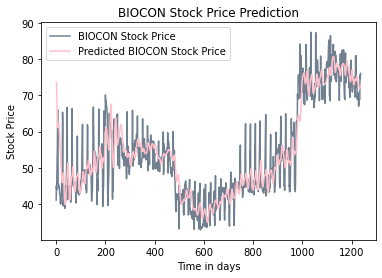

1/1 [==============================] - 0s 23ms/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes'), ('2015-01-01 00:00:00', 'CINEVISTA', 3.599999905, array([[3.7642553]], dtype=float32), 3.849999905, 1.0456265211105347, 1.0694444462770063, 'Yes'), ('2015-01-01 00:00:00', 'BSLNIFTY', 85.94999695, array([[78.73029]], dtype=float32), 97.0, 0.9160011410713196, 1.1285631581398212, 'No'), ('2015-01-01 00:00:00', 'BEDMUTHA', 16.20000076, array([[18.430365]], dtype=float3

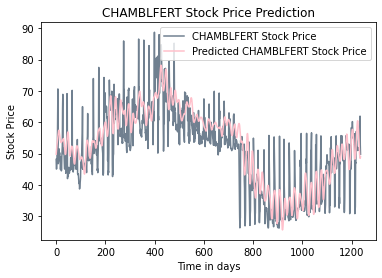

1/1 [==============================] - 0s 155ms/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes'), ('2015-01-01 00:00:00', 'CINEVISTA', 3.599999905, array([[3.7642553]], dtype=float32), 3.849999905, 1.0456265211105347, 1.0694444462770063, 'Yes'), ('2015-01-01 00:00:00', 'BSLNIFTY', 85.94999695, array([[78.73029]], dtype=float32), 97.0, 0.9160011410713196, 1.1285631581398212, 'No'), ('2015-01-01 00:00:00', 'BEDMUTHA', 16.20000076, array([[18.430365]], dtype=float

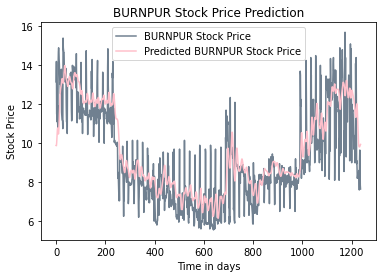

1/1 [==============================] - 0s 31ms/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes'), ('2015-01-01 00:00:00', 'CINEVISTA', 3.599999905, array([[3.7642553]], dtype=float32), 3.849999905, 1.0456265211105347, 1.0694444462770063, 'Yes'), ('2015-01-01 00:00:00', 'BSLNIFTY', 85.94999695, array([[78.73029]], dtype=float32), 97.0, 0.9160011410713196, 1.1285631581398212, 'No'), ('2015-01-01 00:00:00', 'BEDMUTHA', 16.20000076, array([[18.430365]], dtype=float3

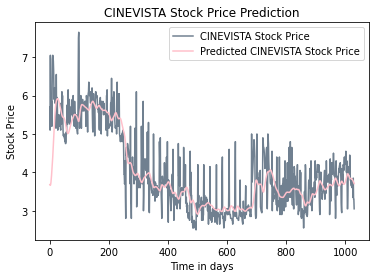

1/1 [==============================] - 0s 24ms/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes'), ('2015-01-01 00:00:00', 'CINEVISTA', 3.599999905, array([[3.7642553]], dtype=float32), 3.849999905, 1.0456265211105347, 1.0694444462770063, 'Yes'), ('2015-01-01 00:00:00', 'BSLNIFTY', 85.94999695, array([[78.73029]], dtype=float32), 97.0, 0.9160011410713196, 1.1285631581398212, 'No'), ('2015-01-01 00:00:00', 'BEDMUTHA', 16.20000076, array([[18.430365]], dtype=float3

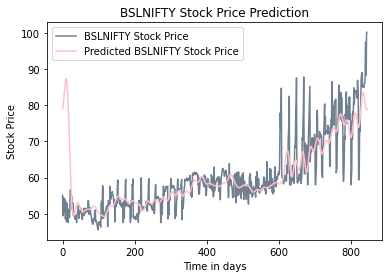

1/1 [==============================] - 0s 40ms/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes'), ('2015-01-01 00:00:00', 'CINEVISTA', 3.599999905, array([[3.7642553]], dtype=float32), 3.849999905, 1.0456265211105347, 1.0694444462770063, 'Yes'), ('2015-01-01 00:00:00', 'BSLNIFTY', 85.94999695, array([[78.73029]], dtype=float32), 97.0, 0.9160011410713196, 1.1285631581398212, 'No'), ('2015-01-01 00:00:00', 'BEDMUTHA', 16.20000076, array([[18.430365]], dtype=float3

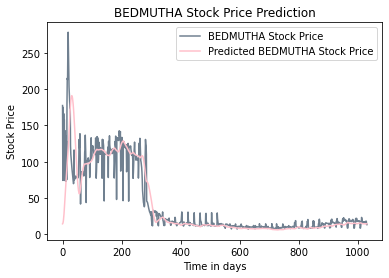

1/1 [==============================] - 0s 33ms/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes'), ('2015-01-01 00:00:00', 'CINEVISTA', 3.599999905, array([[3.7642553]], dtype=float32), 3.849999905, 1.0456265211105347, 1.0694444462770063, 'Yes'), ('2015-01-01 00:00:00', 'BSLNIFTY', 85.94999695, array([[78.73029]], dtype=float32), 97.0, 0.9160011410713196, 1.1285631581398212, 'No'), ('2015-01-01 00:00:00', 'BEDMUTHA', 16.20000076, array([[18.430365]], dtype=float3

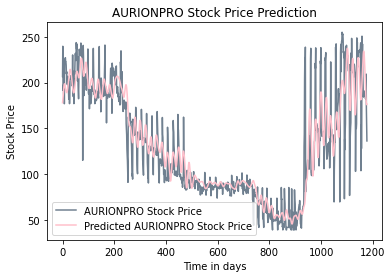

1/1 [==============================] - 0s 23ms/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes'), ('2015-01-01 00:00:00', 'CINEVISTA', 3.599999905, array([[3.7642553]], dtype=float32), 3.849999905, 1.0456265211105347, 1.0694444462770063, 'Yes'), ('2015-01-01 00:00:00', 'BSLNIFTY', 85.94999695, array([[78.73029]], dtype=float32), 97.0, 0.9160011410713196, 1.1285631581398212, 'No'), ('2015-01-01 00:00:00', 'BEDMUTHA', 16.20000076, array([[18.430365]], dtype=float3

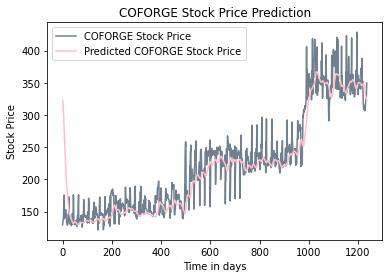

1/1 [==============================] - 0s 25ms/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes'), ('2015-01-01 00:00:00', 'CINEVISTA', 3.599999905, array([[3.7642553]], dtype=float32), 3.849999905, 1.0456265211105347, 1.0694444462770063, 'Yes'), ('2015-01-01 00:00:00', 'BSLNIFTY', 85.94999695, array([[78.73029]], dtype=float32), 97.0, 0.9160011410713196, 1.1285631581398212, 'No'), ('2015-01-01 00:00:00', 'BEDMUTHA', 16.20000076, array([[18.430365]], dtype=float3

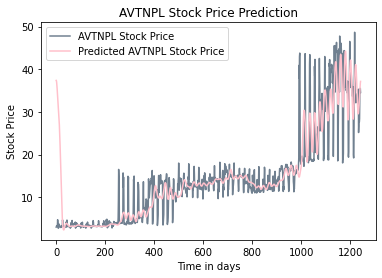

1/1 [==============================] - 0s 27ms/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes'), ('2015-01-01 00:00:00', 'CINEVISTA', 3.599999905, array([[3.7642553]], dtype=float32), 3.849999905, 1.0456265211105347, 1.0694444462770063, 'Yes'), ('2015-01-01 00:00:00', 'BSLNIFTY', 85.94999695, array([[78.73029]], dtype=float32), 97.0, 0.9160011410713196, 1.1285631581398212, 'No'), ('2015-01-01 00:00:00', 'BEDMUTHA', 16.20000076, array([[18.430365]], dtype=float3

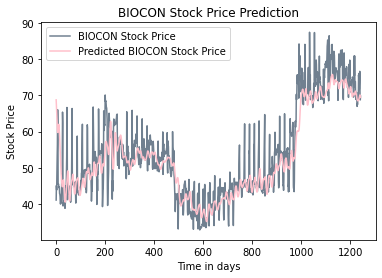

1/1 [==============================] - 0s 27ms/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes'), ('2015-01-01 00:00:00', 'CINEVISTA', 3.599999905, array([[3.7642553]], dtype=float32), 3.849999905, 1.0456265211105347, 1.0694444462770063, 'Yes'), ('2015-01-01 00:00:00', 'BSLNIFTY', 85.94999695, array([[78.73029]], dtype=float32), 97.0, 0.9160011410713196, 1.1285631581398212, 'No'), ('2015-01-01 00:00:00', 'BEDMUTHA', 16.20000076, array([[18.430365]], dtype=float3

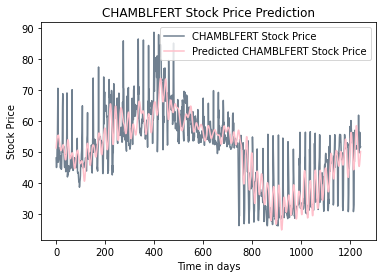

1/1 [==============================] - 0s 25ms/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes'), ('2015-01-01 00:00:00', 'CINEVISTA', 3.599999905, array([[3.7642553]], dtype=float32), 3.849999905, 1.0456265211105347, 1.0694444462770063, 'Yes'), ('2015-01-01 00:00:00', 'BSLNIFTY', 85.94999695, array([[78.73029]], dtype=float32), 97.0, 0.9160011410713196, 1.1285631581398212, 'No'), ('2015-01-01 00:00:00', 'BEDMUTHA', 16.20000076, array([[18.430365]], dtype=float3

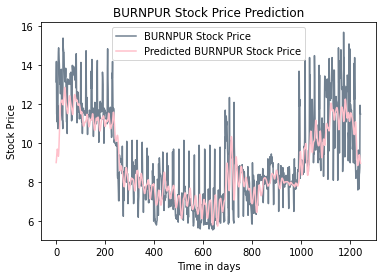

1/1 [==============================] - 0s 25ms/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes'), ('2015-01-01 00:00:00', 'CINEVISTA', 3.599999905, array([[3.7642553]], dtype=float32), 3.849999905, 1.0456265211105347, 1.0694444462770063, 'Yes'), ('2015-01-01 00:00:00', 'BSLNIFTY', 85.94999695, array([[78.73029]], dtype=float32), 97.0, 0.9160011410713196, 1.1285631581398212, 'No'), ('2015-01-01 00:00:00', 'BEDMUTHA', 16.20000076, array([[18.430365]], dtype=float3

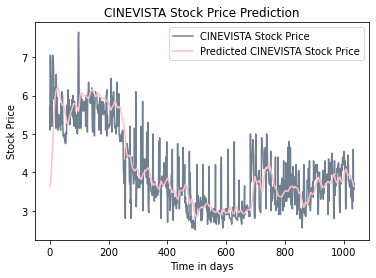

1/1 [==============================] - 0s 43ms/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes'), ('2015-01-01 00:00:00', 'CINEVISTA', 3.599999905, array([[3.7642553]], dtype=float32), 3.849999905, 1.0456265211105347, 1.0694444462770063, 'Yes'), ('2015-01-01 00:00:00', 'BSLNIFTY', 85.94999695, array([[78.73029]], dtype=float32), 97.0, 0.9160011410713196, 1.1285631581398212, 'No'), ('2015-01-01 00:00:00', 'BEDMUTHA', 16.20000076, array([[18.430365]], dtype=float3

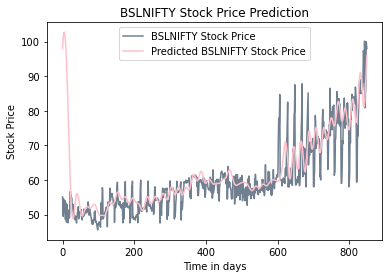

1/1 [==============================] - 0s 33ms/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes'), ('2015-01-01 00:00:00', 'CINEVISTA', 3.599999905, array([[3.7642553]], dtype=float32), 3.849999905, 1.0456265211105347, 1.0694444462770063, 'Yes'), ('2015-01-01 00:00:00', 'BSLNIFTY', 85.94999695, array([[78.73029]], dtype=float32), 97.0, 0.9160011410713196, 1.1285631581398212, 'No'), ('2015-01-01 00:00:00', 'BEDMUTHA', 16.20000076, array([[18.430365]], dtype=float3

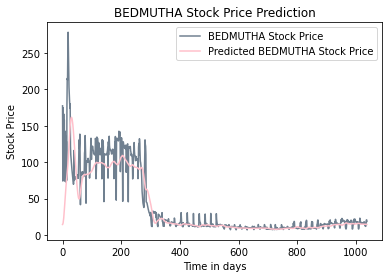

1/1 [==============================] - 0s 28ms/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes'), ('2015-01-01 00:00:00', 'CINEVISTA', 3.599999905, array([[3.7642553]], dtype=float32), 3.849999905, 1.0456265211105347, 1.0694444462770063, 'Yes'), ('2015-01-01 00:00:00', 'BSLNIFTY', 85.94999695, array([[78.73029]], dtype=float32), 97.0, 0.9160011410713196, 1.1285631581398212, 'No'), ('2015-01-01 00:00:00', 'BEDMUTHA', 16.20000076, array([[18.430365]], dtype=float3

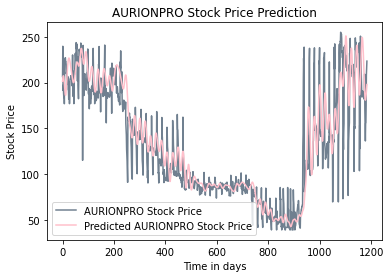

1/1 [==============================] - 1s 1s/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes'), ('2015-01-01 00:00:00', 'CINEVISTA', 3.599999905, array([[3.7642553]], dtype=float32), 3.849999905, 1.0456265211105347, 1.0694444462770063, 'Yes'), ('2015-01-01 00:00:00', 'BSLNIFTY', 85.94999695, array([[78.73029]], dtype=float32), 97.0, 0.9160011410713196, 1.1285631581398212, 'No'), ('2015-01-01 00:00:00', 'BEDMUTHA', 16.20000076, array([[18.430365]], dtype=float32)

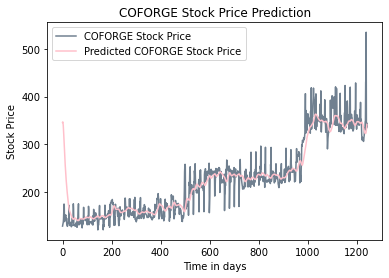

1/1 [==============================] - 0s 41ms/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes'), ('2015-01-01 00:00:00', 'CINEVISTA', 3.599999905, array([[3.7642553]], dtype=float32), 3.849999905, 1.0456265211105347, 1.0694444462770063, 'Yes'), ('2015-01-01 00:00:00', 'BSLNIFTY', 85.94999695, array([[78.73029]], dtype=float32), 97.0, 0.9160011410713196, 1.1285631581398212, 'No'), ('2015-01-01 00:00:00', 'BEDMUTHA', 16.20000076, array([[18.430365]], dtype=float3

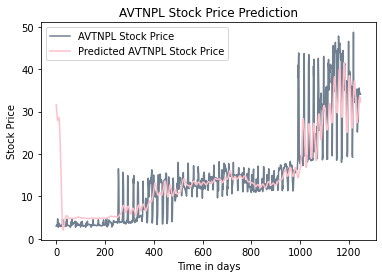

1/1 [==============================] - 2s 2s/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes'), ('2015-01-01 00:00:00', 'CINEVISTA', 3.599999905, array([[3.7642553]], dtype=float32), 3.849999905, 1.0456265211105347, 1.0694444462770063, 'Yes'), ('2015-01-01 00:00:00', 'BSLNIFTY', 85.94999695, array([[78.73029]], dtype=float32), 97.0, 0.9160011410713196, 1.1285631581398212, 'No'), ('2015-01-01 00:00:00', 'BEDMUTHA', 16.20000076, array([[18.430365]], dtype=float32)

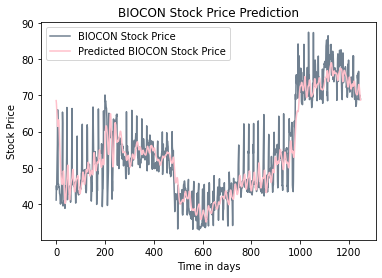

1/1 [==============================] - 1s 1s/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes'), ('2015-01-01 00:00:00', 'CINEVISTA', 3.599999905, array([[3.7642553]], dtype=float32), 3.849999905, 1.0456265211105347, 1.0694444462770063, 'Yes'), ('2015-01-01 00:00:00', 'BSLNIFTY', 85.94999695, array([[78.73029]], dtype=float32), 97.0, 0.9160011410713196, 1.1285631581398212, 'No'), ('2015-01-01 00:00:00', 'BEDMUTHA', 16.20000076, array([[18.430365]], dtype=float32)

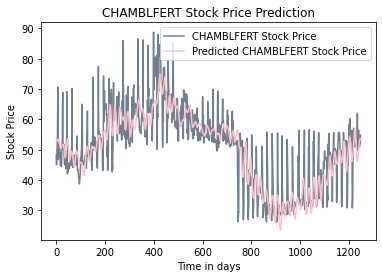

1/1 [==============================] - 1s 1s/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes'), ('2015-01-01 00:00:00', 'CINEVISTA', 3.599999905, array([[3.7642553]], dtype=float32), 3.849999905, 1.0456265211105347, 1.0694444462770063, 'Yes'), ('2015-01-01 00:00:00', 'BSLNIFTY', 85.94999695, array([[78.73029]], dtype=float32), 97.0, 0.9160011410713196, 1.1285631581398212, 'No'), ('2015-01-01 00:00:00', 'BEDMUTHA', 16.20000076, array([[18.430365]], dtype=float32)

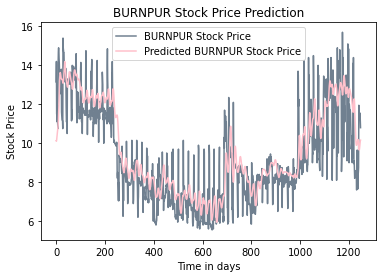

1/1 [==============================] - 1s 1s/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes'), ('2015-01-01 00:00:00', 'CINEVISTA', 3.599999905, array([[3.7642553]], dtype=float32), 3.849999905, 1.0456265211105347, 1.0694444462770063, 'Yes'), ('2015-01-01 00:00:00', 'BSLNIFTY', 85.94999695, array([[78.73029]], dtype=float32), 97.0, 0.9160011410713196, 1.1285631581398212, 'No'), ('2015-01-01 00:00:00', 'BEDMUTHA', 16.20000076, array([[18.430365]], dtype=float32)

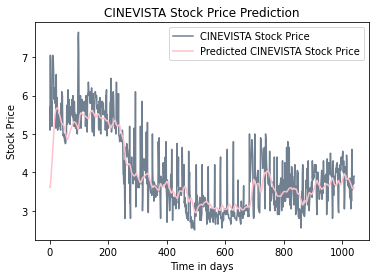

1/1 [==============================] - 0s 51ms/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes'), ('2015-01-01 00:00:00', 'CINEVISTA', 3.599999905, array([[3.7642553]], dtype=float32), 3.849999905, 1.0456265211105347, 1.0694444462770063, 'Yes'), ('2015-01-01 00:00:00', 'BSLNIFTY', 85.94999695, array([[78.73029]], dtype=float32), 97.0, 0.9160011410713196, 1.1285631581398212, 'No'), ('2015-01-01 00:00:00', 'BEDMUTHA', 16.20000076, array([[18.430365]], dtype=float3

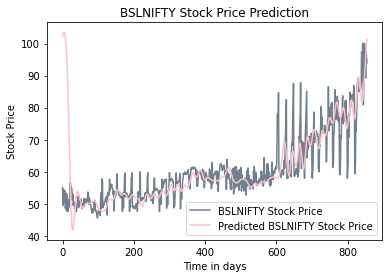

1/1 [==============================] - 0s 170ms/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes'), ('2015-01-01 00:00:00', 'CINEVISTA', 3.599999905, array([[3.7642553]], dtype=float32), 3.849999905, 1.0456265211105347, 1.0694444462770063, 'Yes'), ('2015-01-01 00:00:00', 'BSLNIFTY', 85.94999695, array([[78.73029]], dtype=float32), 97.0, 0.9160011410713196, 1.1285631581398212, 'No'), ('2015-01-01 00:00:00', 'BEDMUTHA', 16.20000076, array([[18.430365]], dtype=float

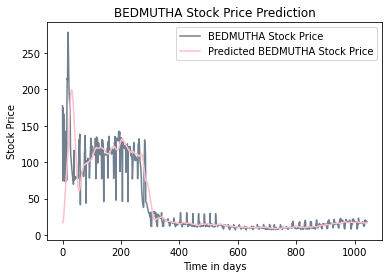

1/1 [==============================] - 0s 31ms/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes'), ('2015-01-01 00:00:00', 'CINEVISTA', 3.599999905, array([[3.7642553]], dtype=float32), 3.849999905, 1.0456265211105347, 1.0694444462770063, 'Yes'), ('2015-01-01 00:00:00', 'BSLNIFTY', 85.94999695, array([[78.73029]], dtype=float32), 97.0, 0.9160011410713196, 1.1285631581398212, 'No'), ('2015-01-01 00:00:00', 'BEDMUTHA', 16.20000076, array([[18.430365]], dtype=float3

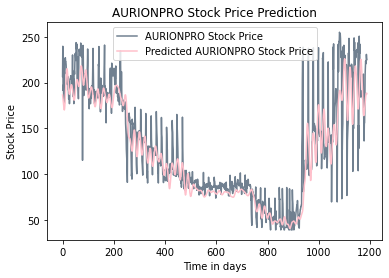

1/1 [==============================] - 0s 33ms/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes'), ('2015-01-01 00:00:00', 'CINEVISTA', 3.599999905, array([[3.7642553]], dtype=float32), 3.849999905, 1.0456265211105347, 1.0694444462770063, 'Yes'), ('2015-01-01 00:00:00', 'BSLNIFTY', 85.94999695, array([[78.73029]], dtype=float32), 97.0, 0.9160011410713196, 1.1285631581398212, 'No'), ('2015-01-01 00:00:00', 'BEDMUTHA', 16.20000076, array([[18.430365]], dtype=float3

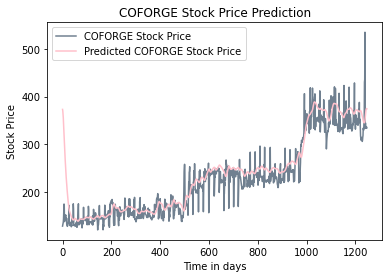

1/1 [==============================] - 2s 2s/step
[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes'), ('2015-01-01 00:00:00', 'CINEVISTA', 3.599999905, array([[3.7642553]], dtype=float32), 3.849999905, 1.0456265211105347, 1.0694444462770063, 'Yes'), ('2015-01-01 00:00:00', 'BSLNIFTY', 85.94999695, array([[78.73029]], dtype=float32), 97.0, 0.9160011410713196, 1.1285631581398212, 'No'), ('2015-01-01 00:00:00', 'BEDMUTHA', 16.20000076, array([[18.430365]], dtype=float32)

In [171]:
def estimate(S,c):
    
    df1=df.loc[df['Symbol']== S] #getting the dataset for a particular stock 
    D = 7*c
    start_date = '2010'
    week_1 = datetime(2015,1,1) + pd.Timedelta(days= D) #prediction week 
    
    end_date = datetime (2015,1,1) + pd.Timedelta(days= D)
    df1 = df1.loc[start_date : end_date ]
        
    bug =1
    if (df1.empty == True):
        
        return bug 
    
    if(len(df1)<60):
        
        return bug
    
    df1 = df1.sort_index(ascending=True)
    #df1.index = df1.index + pd.Timedelta(days= D)
    print (df1.tail(15))
    
    week_0 = datetime(2014, 12, 26)+ pd.Timedelta(days= D) #previous week dte
    
    if (c!= 0):
        week_0 = week_0 - pd.Timedelta(days= 1)
        
    num= len(df1.axes[0]) #length of the dataset
    print (week_0) #Current week
    
    
    
    training_set = df1.iloc[:, 1:2].values
    sc = MinMaxScaler(feature_range=(0,1)) #fits the closing price values in the range of 0 to 1
    scaled_training_set = sc.fit_transform(training_set)
    X_train = [] 
    y_train = []
    prediction_days=60
    
    for i in range(prediction_days,num):
        X_train.append(scaled_training_set[i-prediction_days:i, 0])
        y_train.append(scaled_training_set[i, 0])
    
    X_train, y_train = np.array(X_train), np.array(y_train) 
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    
    #Building the model
    
    model = Sequential ()
    
    model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    
    model.add(LSTM(units=50,return_sequences=True))
    model.add(Dropout(0.2))
    
    model.add(LSTM(units=50,return_sequences=True))
    model.add(Dropout(0.2))
    
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    
    model.add(Dense(units=1))
    
    model.compile(optimizer='adam',loss='mean_squared_error')
    model.fit(X_train,y_train,epochs=25,batch_size=32)
    
    #Testing the Model
    
    dataset_test = df.loc[df['Symbol']==S]
    dataset_test = dataset_test.loc[start_date : end_date ]
    real_stock_price = dataset_test.iloc[:, 1:2].values
    dataset_total = pd.concat((df1['Close'], dataset_test['Close']), axis = 0)
    
    inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values 
    inputs = inputs.reshape(-1,1)
    inputs = sc.transform(inputs)
    
    X_test = []
    for i in range(prediction_days,len(inputs)):
        X_test.append(inputs[i-prediction_days:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    predicted_stock_price = model.predict(X_test)  
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)
    
    #Visualising the data for better understanding
    
    plt.plot(real_stock_price, color = 'slategrey', label = S + ' Stock Price')
    plt.plot(predicted_stock_price, color = 'pink', label = 'Predicted '+ S +' Stock Price')
    plt.title(S +' Stock Price Prediction')
    plt.xlabel('Time in days')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()
    
    
    real_data= [inputs[len(inputs)- prediction_days:len(inputs),0]]
    real_data= np.array(real_data)
    real_data= np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))
    predicted_value=model.predict(real_data)
    predicted_value= sc.inverse_transform(predicted_value)
    
    #getting the previous week and actual value of the stock on week 0 and week 1
    
    for k in range(0,5):
        
        if((df1['Close'].loc[df1.index ==(week_0 - pd.Timedelta(days= k))]).empty==True):
            continue
        else:
            previous_value = float(df1['Close'].loc[df1.index ==(week_0 - pd.Timedelta(days= k))])
            break
            
    for m in range(0,5):
        
        if(df1['Close'].loc[df1.index ==(week_1 - pd.Timedelta(days= m))].empty==True):
            continue
        else:
            actual_value =  float(df1['Close'].loc[df1.index ==(week_1 - pd.Timedelta(days= m))])
            break
    
   
    predicted_progress = float (predicted_value / previous_value) 
    
    if (predicted_progress > 1):
        selection = 'Yes'
    else:
        selection = 'No'
    
    #Appending the values in the lists
    
    week_date.append(str(week_1))
    stockname.append(S)
    prev_week_price.append(previous_value)
    actual_price.append(actual_value)
    predicted_price.append(predicted_value)
    predicted_growth.append(predicted_progress)
    actual_growth.append(float(actual_value / previous_value))
    pick.append(selection)
    
    weekly_result = list(zip(week_date, stockname, prev_week_price,predicted_price,actual_price,predicted_growth,actual_growth,pick))
    
    return weekly_result 


for i in range (0,4): 
    #loop that iterates the number of weeks
    x=[] #list to store each returned value
    
    for j in range(50, 65):
        #loop that iterates the number of stocks to test this model on
        x=(estimate(Stocklist[j] , i)) #calling the 'estimate' function and sending the stock name and week number as arguments
        if(x==1):
            continue
        final = x.copy()
        print (final) 
            
        

Making a new dataset for all the new values

In [173]:

data=df = pd.DataFrame(final, columns=['Date','Stock Name','Prev Week Price','Predicted Price', 'Actual price','Predicted Growth','Actual Growth','Pick'])

final_data= data.sort_values(by = 'Predicted Growth',ascending = False)


print (final)

print (final_data)






[('2015-01-01 00:00:00', 'AVTNPL', 34.33992386, array([[30.359854]], dtype=float32), 35.32619476, 0.8840978741645813, 1.028720823727534, 'No'), ('2015-01-01 00:00:00', 'BIOCON', 67.68266296, array([[73.75015]], dtype=float32), 68.95616913, 1.0896461009979248, 1.0188158401916403, 'Yes'), ('2015-01-01 00:00:00', 'CHAMBLFERT', 51.13233185, array([[47.43886]], dtype=float32), 52.19846725, 0.9277664422988892, 1.0208505139786619, 'No'), ('2015-01-01 00:00:00', 'BURNPUR', 8.600000381, array([[9.211634]], dtype=float32), 9.649999619, 1.0711201429367065, 1.1220929292421622, 'Yes'), ('2015-01-01 00:00:00', 'CINEVISTA', 3.599999905, array([[3.7642553]], dtype=float32), 3.849999905, 1.0456265211105347, 1.0694444462770063, 'Yes'), ('2015-01-01 00:00:00', 'BSLNIFTY', 85.94999695, array([[78.73029]], dtype=float32), 97.0, 0.9160011410713196, 1.1285631581398212, 'No'), ('2015-01-01 00:00:00', 'BEDMUTHA', 16.20000076, array([[18.430365]], dtype=float32), 18.0, 1.13767671585083, 1.1111110589849131, 'Yes

In [174]:
final_data.to_csv("check.csv")